### objective: The aim behind this analysis of flight price prediction is study of flight booking dataset and performing various Exploratory Data Analysis technique and then building a machine learning model to prdect the flight price

Dataset: https://www.kaggle.com/datasets/swatikhedekar/flight-price-prediction-eda-and-fe?resource=download

Research Questions
The aim of our study is to answer the below research questions:
a) Does price vary with Airlines?
b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
c) Does ticket price change based on the departure time and arrival time?
d) How the price changes with change in Source and Destination?
e) How does the ticket price vary between Economy and Business class?

In [126]:
import pandas as pd 
import numpy as np
import seaborn as sns
from datasist.structdata import detect_outliers
from category_encoders import BinaryEncoder
from sklearn.preprocessing import RobustScaler
from sklearn . feature_selection import SequentialFeatureSelector
from sklearn . pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [127]:
df= pd.read_excel('C:/Users/BH/Downloads/flights_data.xlsx')

In [128]:
df  

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# info. about data

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# ckeck_duplicated

In [130]:
df.duplicated().sum()

220

In [131]:
df.drop_duplicates(inplace = True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


# Univariate Analysis

1) Airline

In [133]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Airline'>

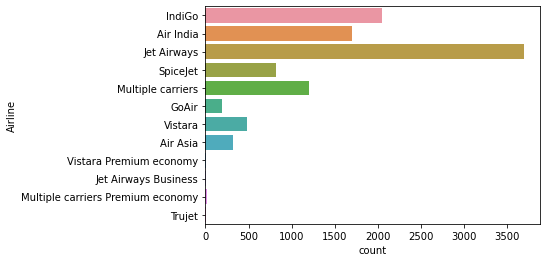

In [134]:
sns.countplot(data=df,y= 'Airline')

2) Source

In [135]:
df['Source'].value_counts()

Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

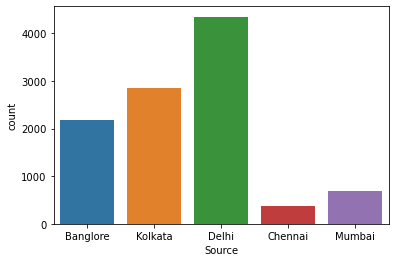

In [136]:
sns.countplot(data=df,x= 'Source')

3) Destination

In [137]:
df['Destination'].unique().tolist()

['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']

<AxesSubplot:xlabel='Destination', ylabel='count'>

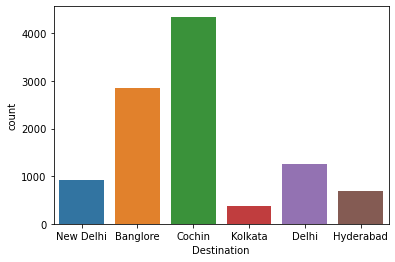

In [138]:
sns.countplot(data=df,x= 'Destination')

4) Route

In [139]:
df['Route'].unique().tolist()

['BLR → DEL',
 'CCU → IXR → BBI → BLR',
 'DEL → LKO → BOM → COK',
 'CCU → NAG → BLR',
 'BLR → NAG → DEL',
 'CCU → BLR',
 'BLR → BOM → DEL',
 'DEL → BOM → COK',
 'DEL → BLR → COK',
 'MAA → CCU',
 'CCU → BOM → BLR',
 'DEL → AMD → BOM → COK',
 'DEL → PNQ → COK',
 'DEL → CCU → BOM → COK',
 'BLR → COK → DEL',
 'DEL → IDR → BOM → COK',
 'DEL → LKO → COK',
 'CCU → GAU → DEL → BLR',
 'DEL → NAG → BOM → COK',
 'CCU → MAA → BLR',
 'DEL → HYD → COK',
 'CCU → HYD → BLR',
 'DEL → COK',
 'CCU → DEL → BLR',
 'BLR → BOM → AMD → DEL',
 'BOM → DEL → HYD',
 'DEL → MAA → COK',
 'BOM → HYD',
 'DEL → BHO → BOM → COK',
 'DEL → JAI → BOM → COK',
 'DEL → ATQ → BOM → COK',
 'DEL → JDH → BOM → COK',
 'CCU → BBI → BOM → BLR',
 'BLR → MAA → DEL',
 'DEL → GOI → BOM → COK',
 'DEL → BDQ → BOM → COK',
 'CCU → JAI → BOM → BLR',
 'CCU → BBI → BLR',
 'BLR → HYD → DEL',
 'DEL → TRV → COK',
 'CCU → IXR → DEL → BLR',
 'DEL → IXU → BOM → COK',
 'CCU → IXB → BLR',
 'BLR → BOM → JDH → DEL',
 'DEL → UDR → BOM → COK',
 'DEL → HY

In [140]:
df[df['Route'].isnull()==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [141]:
df.drop(9039 , axis=0 ,inplace=True)

In [142]:
df[df['Route'].isnull()==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [143]:
df.reset_index(inplace = True , drop = True)

5) Price

In [144]:
df['Price'].describe()

count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

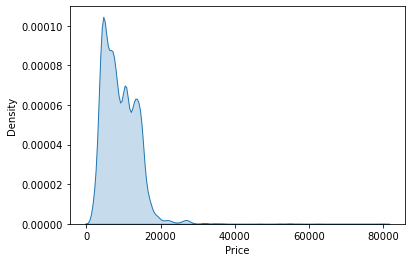

In [145]:
sns.kdeplot(data = df, x = 'Price' , shade = True)

<AxesSubplot:xlabel='Price'>

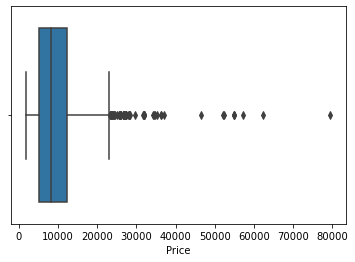

In [146]:
sns.boxplot(data = df ,x ='Price')

In [147]:
price_outliers_indies= detect_outliers(df , 0 , ['Price'])

In [148]:
len(price_outliers_indies)

94

In [149]:
df.iloc[ price_outliers_indies ]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10148,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10159,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10178,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10231,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


5) Total_Stops

In [150]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [151]:
def number_stops(r):
    if r[0]=='n':
        return 0
    else :
        return r[0]

In [152]:
df['No_stops']= df['Total_Stops'].apply(number_stops)

In [153]:
df['No_stops']=pd.to_numeric(df['No_stops'])

In [154]:
df['No_stops']

0        0
1        2
2        2
3        1
4        1
        ..
10457    0
10458    0
10459    0
10460    0
10461    2
Name: No_stops, Length: 10462, dtype: int64

In [155]:
df.drop(['Total_Stops'] , axis =1 , inplace= True)

In [156]:
df.drop(['Route'] , axis =1 , inplace= True)

 after data understanding an analysis we discover that the column of  no_stops correspond to column route so we drop route

6) Additional_Info

In [157]:
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Additional_Info'>

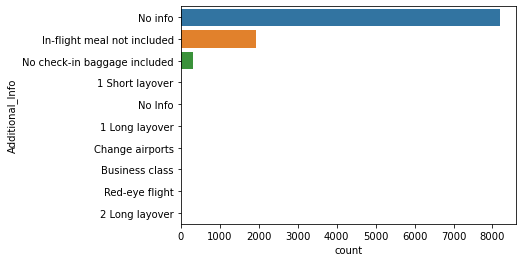

In [158]:
sns.countplot(data=df,y= 'Additional_Info')

In [159]:
df[(df['Additional_Info']=='No check-in baggage included') & (df['Price']< 6400)]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,No_stops
45,SpiceJet,24/03/2019,Banglore,New Delhi,05:45,08:35,2h 50m,No check-in baggage included,3527,0
79,SpiceJet,21/03/2019,Chennai,Kolkata,08:20,10:35,2h 15m,No check-in baggage included,3332,0
96,SpiceJet,15/05/2019,Banglore,Delhi,05:55,08:35,2h 40m,No check-in baggage included,3257,0
195,SpiceJet,27/06/2019,Chennai,Kolkata,09:45,12:00,2h 15m,No check-in baggage included,3543,0
228,SpiceJet,21/05/2019,Mumbai,Hyderabad,05:45,07:15,1h 30m,No check-in baggage included,1965,0
...,...,...,...,...,...,...,...,...,...,...
10354,SpiceJet,27/04/2019,Kolkata,Banglore,22:20,00:40 28 Apr,2h 20m,No check-in baggage included,3841,0
10377,SpiceJet,12/06/2019,Delhi,Cochin,08:45,13:15,4h 30m,No check-in baggage included,5158,1
10387,SpiceJet,12/05/2019,Banglore,Delhi,09:30,12:20,2h 50m,No check-in baggage included,4319,0
10435,SpiceJet,12/06/2019,Banglore,Delhi,05:55,08:35,2h 40m,No check-in baggage included,4319,0


7) Duration

In [160]:
def dur_per_hour(r):
    try :
        total= (float(r[-3:-1])/60)+ float(r[:2])
        return total
    except :
        total= (float(r[-3:-1])/60)+ float(r[:1])
        return total
           
        

In [161]:
df['duration_modif'] = df['Duration'].apply(dur_per_hour)

In [162]:
df['duration_modif']

0         2.833333
1         7.416667
2        19.316667
3         5.416667
4         4.750000
           ...    
10457     2.500000
10458     2.583333
10459     3.050000
10460     2.666667
10461     8.333333
Name: duration_modif, Length: 10462, dtype: float64

In [163]:
df.drop(['Duration'] , axis =1 , inplace= True)

<AxesSubplot:xlabel='duration_modif', ylabel='Density'>

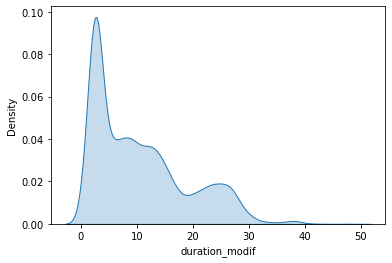

In [164]:
sns.kdeplot(data = df , x = 'duration_modif' , shade = True)

In [165]:
df['duration_modif'].describe()

count    10462.000000
mean        10.514604
std          8.358507
min          1.250000
25%          2.833333
50%          8.416667
75%         15.250000
max         47.783333
Name: duration_modif, dtype: float64

In [166]:
duration_outliers_indies= detect_outliers(df , 0 , ['duration_modif'])

In [167]:
len(duration_outliers_indies)

74

In [168]:
df.iloc[duration_outliers_indies]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Additional_Info,Price,No_stops,duration_modif
226,Jet Airways,3/03/2019,Delhi,Cochin,05:25,18:50 04 Mar,No info,18799,2,37.416667
470,Jet Airways,21/03/2019,Delhi,Cochin,18:20,04:25 23 Mar,No info,13082,2,34.083333
553,Air India,9/03/2019,Delhi,Cochin,05:00,19:15 10 Mar,No info,10598,2,38.250000
918,Air India,12/05/2019,Kolkata,Banglore,12:00,23:15 13 May,No info,10991,3,35.250000
924,Jet Airways,6/03/2019,Delhi,Cochin,16:50,04:25 08 Mar,No info,19907,2,35.583333
...,...,...,...,...,...,...,...,...,...,...
9526,Air India,3/03/2019,Delhi,Cochin,05:55,19:15 04 Mar,No info,13748,2,37.333333
9831,Air India,9/05/2019,Delhi,Cochin,05:00,19:15 10 May,No info,9653,2,38.250000
10121,Air India,03/03/2019,Banglore,New Delhi,05:50,22:10 07 Mar,No info,11791,2,40.333333
10247,Jet Airways,6/03/2019,Delhi,Cochin,19:10,18:50 08 Mar,No info,20694,2,47.666667


# featuer engineering

1) Date_of_Journey

In [169]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

In [170]:
df['Month'] = df['Date_of_Journey'].dt.month

In [171]:
df['Day_Name'] = df['Date_of_Journey'].dt.day_name()

2) Dep_Time

In [172]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'], format='%H:%M')

In [173]:
df['Dep_Time']

0       1900-01-01 22:20:00
1       1900-01-01 05:50:00
2       1900-01-01 09:25:00
3       1900-01-01 18:05:00
4       1900-01-01 16:50:00
                ...        
10457   1900-01-01 19:55:00
10458   1900-01-01 20:45:00
10459   1900-01-01 08:20:00
10460   1900-01-01 11:30:00
10461   1900-01-01 10:55:00
Name: Dep_Time, Length: 10462, dtype: datetime64[ns]

In [174]:
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['DEP_Minute'] = df['Dep_Time'].dt.minute

In [175]:
df.drop(['Dep_Time'] , axis =1 , inplace= True)

In [176]:
def map_hours(x):
    if x in range(0, 13):
        return 'morning'
    elif x in range(13, 19):
        return 'afternoon'
    else:
        return 'evening'
    
df['Period_of_day'] = df['Dep_Hour'].apply(map_hours)

In [177]:
df['Period_of_day'].value_counts()

morning      5448
afternoon    2826
evening      2188
Name: Period_of_day, dtype: int64

In [178]:
df

,Airline,Date_of_Journey,Source,Destination,Arrival_Time,Additional_Info,Price,No_stops,duration_modif,Month,Day_Name,Dep_Hour,DEP_Minute,Period_of_day
0,IndiGo,2019-03-24,Banglore,New Delhi,01:10 22 Mar,No info,3897,0,2.833333,3,Sunday,22,20,evening
1,Air India,2019-05-01,Kolkata,Banglore,13:15,No info,7662,2,7.416667,5,Wednesday,5,50,morning
2,Jet Airways,2019-06-09,Delhi,Cochin,04:25 10 Jun,No info,13882,2,19.316667,6,Sunday,9,25,morning
3,IndiGo,2019-05-12,Kolkata,Banglore,23:30,No info,6218,1,5.416667,5,Sunday,18,5,afternoon
4,IndiGo,2019-03-01,Banglore,New Delhi,21:35,No info,13302,1,4.750000,3,Friday,16,50,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,2019-04-09,Kolkata,Banglore,22:25,No info,4107,0,2.500000,4,Tuesday,19,55,evening
10458,Air India,2019-04-27,Kolkata,Banglore,23:20,No info,4145,0,2.583333,4,Saturday,20,45,evening
10459,Jet Airways,2019-04-27,Banglore,Delhi,11:20,No info,7229,0,3.050000,4,Saturday,8,20,morning
10460,Vistara,2019-03-01,Banglore,New Delhi,14:10,No info,12648,0,2.666667,3,Friday,11,30,morning


In [179]:
df.drop(['Arrival_Time'] , axis =1 , inplace= True)

# saving the modifed data

In [180]:
df.to_excel('modifed_data.xlsx')

# questions

what is the highest expensive ticket ? & which type of airline ?

In [181]:
df[df['Price']==df['Price'].max()]

,Airline,Date_of_Journey,Source,Destination,Additional_Info,Price,No_stops,duration_modif,Month,Day_Name,Dep_Hour,DEP_Minute,Period_of_day
2904,Jet Airways Business,2019-03-01,Banglore,New Delhi,Business class,79512,1,5.666667,3,Friday,5,45,morning


In [182]:
df[df['Price']==df['Price'].max()]['Airline']

2904    Jet Airways Business
Name: Airline, dtype: object

1) is a  Relation bet. airline & price ?

<AxesSubplot:xlabel='Price', ylabel='Airline'>

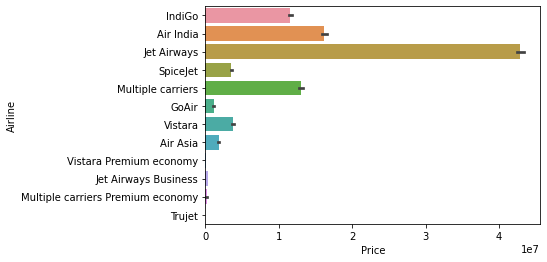

In [183]:
sns.barplot(data = df , y='Airline' , x='Price' , estimator=sum )

In [184]:
df.groupby('Airline').sum()['Price'].sort_values(ascending = False)

Airline
Jet Airways                          42916378
Air India                            16188894
Multiple carriers                    13039603
IndiGo                               11580684
Vistara                               3729048
SpiceJet                              3533711
Air Asia                              1783293
GoAir                                 1137045
Jet Airways Business                   350152
Multiple carriers Premium economy      148445
Vistara Premium economy                 26887
Trujet                                   4140
Name: Price, dtype: int64

2) what is the differance between economy and business in  tikets_price?

<AxesSubplot:xlabel='Price', ylabel='Airline'>

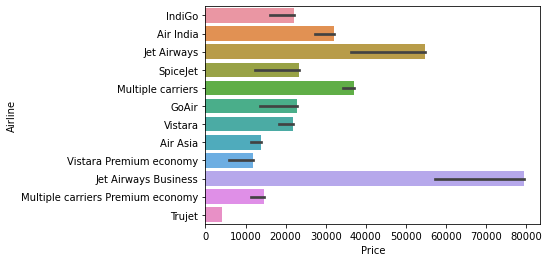

In [185]:
sns.barplot(data = df , y='Airline' , x='Price' , estimator=max )

In [186]:
df.groupby('Airline').max()['Price'].sort_values(ascending = False)

Airline
Jet Airways Business                 79512
Jet Airways                          54826
Multiple carriers                    36983
Air India                            31945
SpiceJet                             23267
GoAir                                22794
IndiGo                               22153
Vistara                              21730
Multiple carriers Premium economy    14629
Air Asia                             13774
Vistara Premium economy              11793
Trujet                                4140
Name: Price, dtype: int64

3) is the dep_time of journy affected on price of ticket ?

<AxesSubplot:xlabel='Period_of_day', ylabel='Price'>

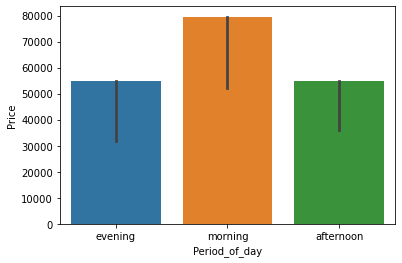

In [187]:
sns.barplot(data = df , x='Period_of_day' , y='Price' , estimator=max )

In [188]:
df.groupby('Period_of_day').sum()['Price'].sort_values(ascending = False)

Period_of_day
morning      49154863
afternoon    26301369
evening      18982048
Name: Price, dtype: int64

4) How the price changes with change in Source and Destination?

In [189]:
x = pd.pivot_table(data = df , columns= 'Source' , index ='Destination' , values ='Price' , aggfunc=sum)

In [190]:
x

Source,Banglore,Chennai,Delhi,Kolkata,Mumbai
Destination,,,,,
Banglore,NaN,NaN,NaN,26149219.0,NaN
Cochin,NaN,NaN,45455655.0,NaN,NaN
Delhi,6507057.0,NaN,NaN,NaN,NaN
Hyderabad,NaN,NaN,NaN,NaN,3526617.0
Kolkata,NaN,1824949.0,NaN,NaN,NaN
New Delhi,10974783.0,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Source', ylabel='Destination'>

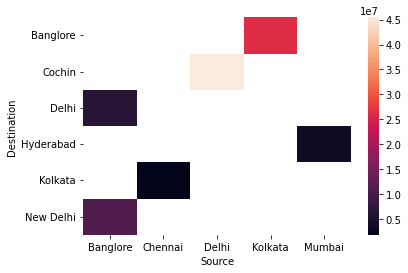

In [191]:
sns.heatmap(x)

5) which day of week has the highest number of journy?

<AxesSubplot:xlabel='Day_Name', ylabel='count'>

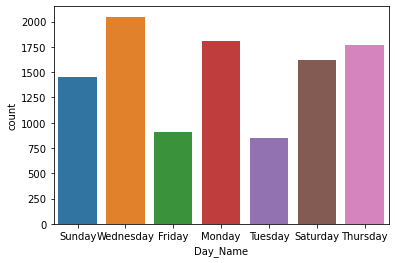

In [192]:
sns.countplot(data=df , x= 'Day_Name')

 6) is there any corrleation between duration of the trip and price ? 

In [193]:
df[['duration_modif','No_stops', 'Price']].corr()

,duration_modif,No_stops,Price
duration_modif,1.000000,0.728291,0.502027
No_stops,0.728291,1.000000,0.602013
Price,0.502027,0.602013,1.000000


<AxesSubplot:xlabel='duration_modif', ylabel='Price'>

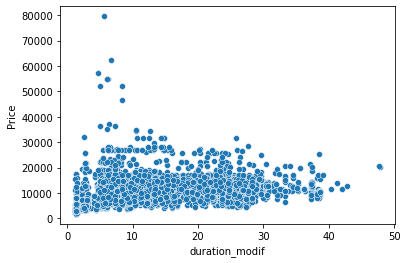

In [194]:
sns.scatterplot(data = df , x = 'duration_modif' , y ='Price')

7) which month and day  has the hightest number of  fligths? 

<AxesSubplot:xlabel='Month', ylabel='count'>

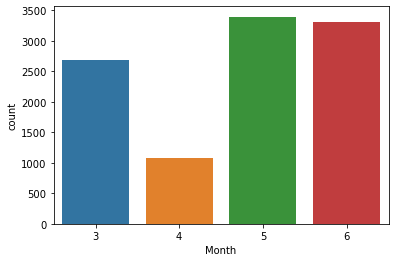

In [195]:
sns.countplot(data=df , x= 'Month' )

In [196]:
df['Month'].value_counts()

5    3395
6    3311
3    2678
4    1078
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='count'>

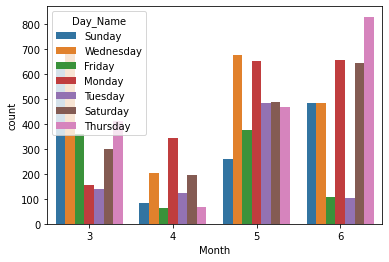

In [197]:
sns.countplot(data=df , x= 'Month' , hue = 'Day_Name')

which month give the highest profit

In [198]:
df.groupby('Month').sum()['Price'].sort_values(ascending = False)

Month
5    30654269
6    28925401
3    28642274
4     6216336
Name: Price, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Price'>

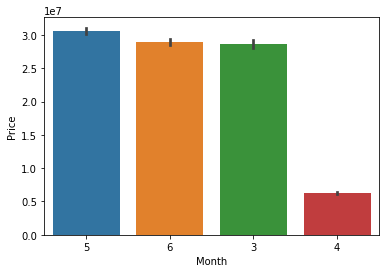

In [199]:
sns.barplot(data = df , x='Month' , y='Price' , estimator=sum , order=df.groupby('Month').sum()['Price'].sort_values(ascending = False).index)

which source_city has the most flights? 

<AxesSubplot:xlabel='Source', ylabel='count'>

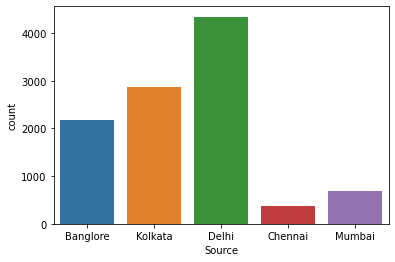

In [200]:
sns.countplot(data=df,x= 'Source')

what is the number of flights that corresbonding to Business class ?

In [201]:
df[df['Additional_Info']=='Business class']

,Airline,Date_of_Journey,Source,Destination,Additional_Info,Price,No_stops,duration_modif,Month,Day_Name,Dep_Hour,DEP_Minute,Period_of_day
2904,Jet Airways Business,2019-03-01,Banglore,New Delhi,Business class,79512,1,5.666667,3,Friday,5,45,morning
3010,Jet Airways,2019-03-01,Banglore,New Delhi,Business class,28097,1,6.500000,3,Friday,5,50,morning
5312,Jet Airways Business,2019-03-01,Banglore,New Delhi,Business class,62427,1,6.666667,3,Friday,5,45,morning
10159,Jet Airways Business,2019-03-01,Banglore,New Delhi,Business class,57209,1,4.666667,3,Friday,9,45,morning


In [202]:
df[df['Additional_Info']=='Business class'].shape[0]

4

what is the number of fligths have 2 Long layover ? 

In [203]:
df[(df['Additional_Info']=='2 Long layover')].shape[0]

1

what is the numbur of  flights that have max number of stops ?

In [204]:
df[df['No_stops']==df['No_stops'].max()]

,Airline,Date_of_Journey,Source,Destination,Additional_Info,Price,No_stops,duration_modif,Month,Day_Name,Dep_Hour,DEP_Minute,Period_of_day
9029,Air India,2019-03-01,Banglore,New Delhi,Change airports,17686,4,29.5,3,Friday,5,50,morning


# prepare data to ML model 

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Additional_Info  10462 non-null  object        
 5   Price            10462 non-null  int64         
 6   No_stops         10462 non-null  int64         
 7   duration_modif   10462 non-null  float64       
 8   Month            10462 non-null  int64         
 9   Day_Name         10462 non-null  object        
 10  Dep_Hour         10462 non-null  int64         
 11  DEP_Minute       10462 non-null  int64         
 12  Period_of_day    10462 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 1.0+ MB


# univariant analysis for categorical column

1) Airline 

In [206]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [207]:
df['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [208]:
df['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [209]:
df['Day_Name'].value_counts()

Wednesday    2048
Monday       1807
Thursday     1774
Saturday     1623
Sunday       1449
Friday        908
Tuesday       853
Name: Day_Name, dtype: int64

In [210]:
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [211]:
df['Additional_Info'].mode()

0    No info
Name: Additional_Info, dtype: object

In [212]:
def modify_info(r):
    if r== 'In-flight meal not included':
        return r
    elif r=='No check-in baggage included':
        return r
    else :
        return 'No info'
    
    
    
    

In [213]:
df['Add_info_modi']=df['Additional_Info'].apply(modify_info)

In [214]:
df['Add_info_modi'].value_counts()

No info                         8218
In-flight meal not included     1926
No check-in baggage included     318
Name: Add_info_modi, dtype: int64

In [215]:
df.drop(['Additional_Info'] , axis =1 , inplace= True)

In [216]:
df['Period_of_day'].value_counts() #ordinal

morning      5448
afternoon    2826
evening      2188
Name: Period_of_day, dtype: int64

In [217]:
df['No_stops'].value_counts()

1    5625
0    3475
2    1318
3      43
4       1
Name: No_stops, dtype: int64

In [218]:
df['Month'].value_counts()

5    3395
6    3311
3    2678
4    1078
Name: Month, dtype: int64

# Encoding

In [219]:
from category_encoders import BinaryEncoder

In [220]:
encoder = BinaryEncoder()

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Price            10462 non-null  int64         
 5   No_stops         10462 non-null  int64         
 6   duration_modif   10462 non-null  float64       
 7   Month            10462 non-null  int64         
 8   Day_Name         10462 non-null  object        
 9   Dep_Hour         10462 non-null  int64         
 10  DEP_Minute       10462 non-null  int64         
 11  Period_of_day    10462 non-null  object        
 12  Add_info_modi    10462 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [222]:
Transformed_Airline_Df = encoder.fit_transform(df[['Airline']])

In [223]:
df = pd.concat([df,Transformed_Airline_Df] , axis = 1 )

####################

In [224]:
Transformed_Source_Df = encoder.fit_transform(df[['Source']])

In [225]:
df = pd.concat([df,Transformed_Source_Df] , axis = 1 )

####################

In [226]:
Transformed_Destination_Df = encoder.fit_transform(df[['Destination']])

In [227]:
df = pd.concat([df,Transformed_Destination_Df] , axis = 1 )

#######################

In [228]:
Transformed_Day_Name_Df = encoder.fit_transform(df[['Day_Name']])

In [229]:
df = pd.concat([df,Transformed_Day_Name_Df] , axis = 1 )

#####################

In [230]:
Transformed_Add_info_modi_Df = encoder.fit_transform(df[['Add_info_modi']])

In [231]:
df = pd.concat([df,Transformed_Add_info_modi_Df] , axis = 1 )

#############################

In [232]:
period_day = {'morning':1, 
        'afternoon':2, 
        'evening':3 }


In [233]:
df['Period_of_day'] = df['Period_of_day'].map(period_day)

In [234]:
df['Period_of_day']

0        3
1        1
2        1
3        2
4        2
        ..
10457    3
10458    3
10459    1
10460    1
10461    1
Name: Period_of_day, Length: 10462, dtype: int64

#########################

In [235]:
df.drop(['Date_of_Journey'] , axis =1 , inplace= True)

In [236]:
df.drop(['Airline', 'Source','Destination','Day_Name','Add_info_modi'] , axis =1 , inplace= True)

# split data

In [237]:
x = df.drop('Price' , axis =1)
y = df['Price']

In [238]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

In [239]:
models= list()
models.append(('LR', LinearRegression()))
models.append (('DT', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models. append(('XGB', XGBRegressor()))

In [240]:
for model in models:
    steps = list()
    steps.append(('scaler', RobustScaler()))
    steps.append(model)
    pipeline= Pipeline(steps= steps)
    scores= cross_validate(pipeline,x,y, cv=5,scoring= 'r2', return_train_score=True )
    print(model[0])
    print("r2 train is " ,scores["train_score"].mean() )
    print("r2 test is " , scores["test_score"].mean())
    
    

LR
r2 train is  0.5542191614514609
r2 test is  0.5524455759682182
DT
r2 train is  0.9755377066089752
r2 test is  0.695637995791887
RFR
r2 train is  0.9570004796515323
r2 test is  0.8068459207048251
XGB
r2 train is  0.935344725135827
r2 test is  0.8261058080978485


In [375]:
steps = list()
steps.append(('scaler', RobustScaler()))
steps.append(('XGB', XGBRegressor(n_estimators=30 , max_depth=6,max_leaves=40)))
pipeline= Pipeline(steps= steps)

In [376]:
scores= cross_validate(pipeline,x,y, cv=5,scoring= 'r2', return_train_score=True)
print("r2 train is " ,scores["train_score"].mean() )
print("r2 test is " , scores["test_score"].mean())
    

r2 train is  0.8851469333324818
r2 test is  0.823109561840196
